In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

In [18]:
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y_true = iris.target  # Actual labels (species)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
mean_shift = MeanShift(bandwidth=1.5)  # You can adjust the bandwidth parameter
mean_shift.fit(X_scaled)

MeanShift(bandwidth=1.5)

In [8]:
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

In [20]:
n_clusters = len(np.unique(labels))
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 2


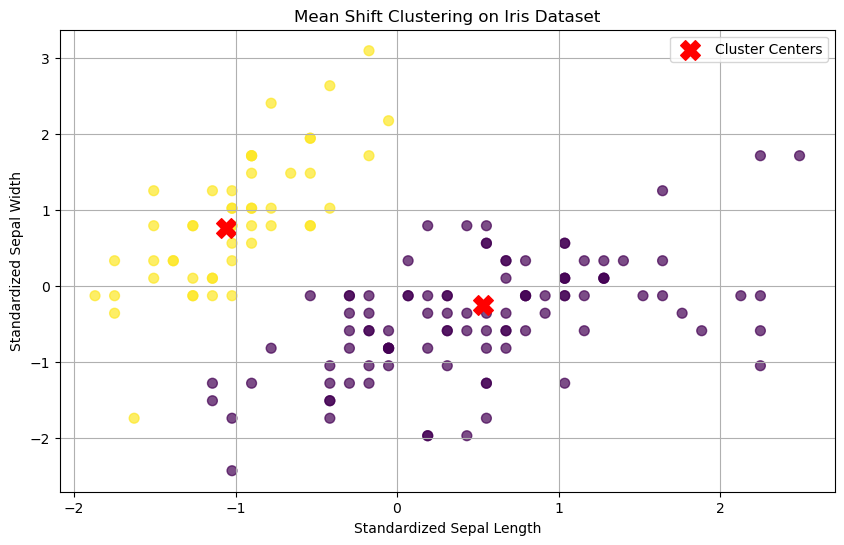

In [10]:
plt.figure(figsize=(10, 6))
# Scatter plot of the first two features (sepal length and sepal width)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('Mean Shift Clustering on Iris Dataset')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.legend()
plt.grid()
plt.show()

In [11]:
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)
silhouette = silhouette_score(X_scaled, labels)

In [12]:
# Print the evaluation metrics
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

Adjusted Rand Index (ARI): 0.568
Normalized Mutual Information (NMI): 0.734
Silhouette Score: 0.582
